No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


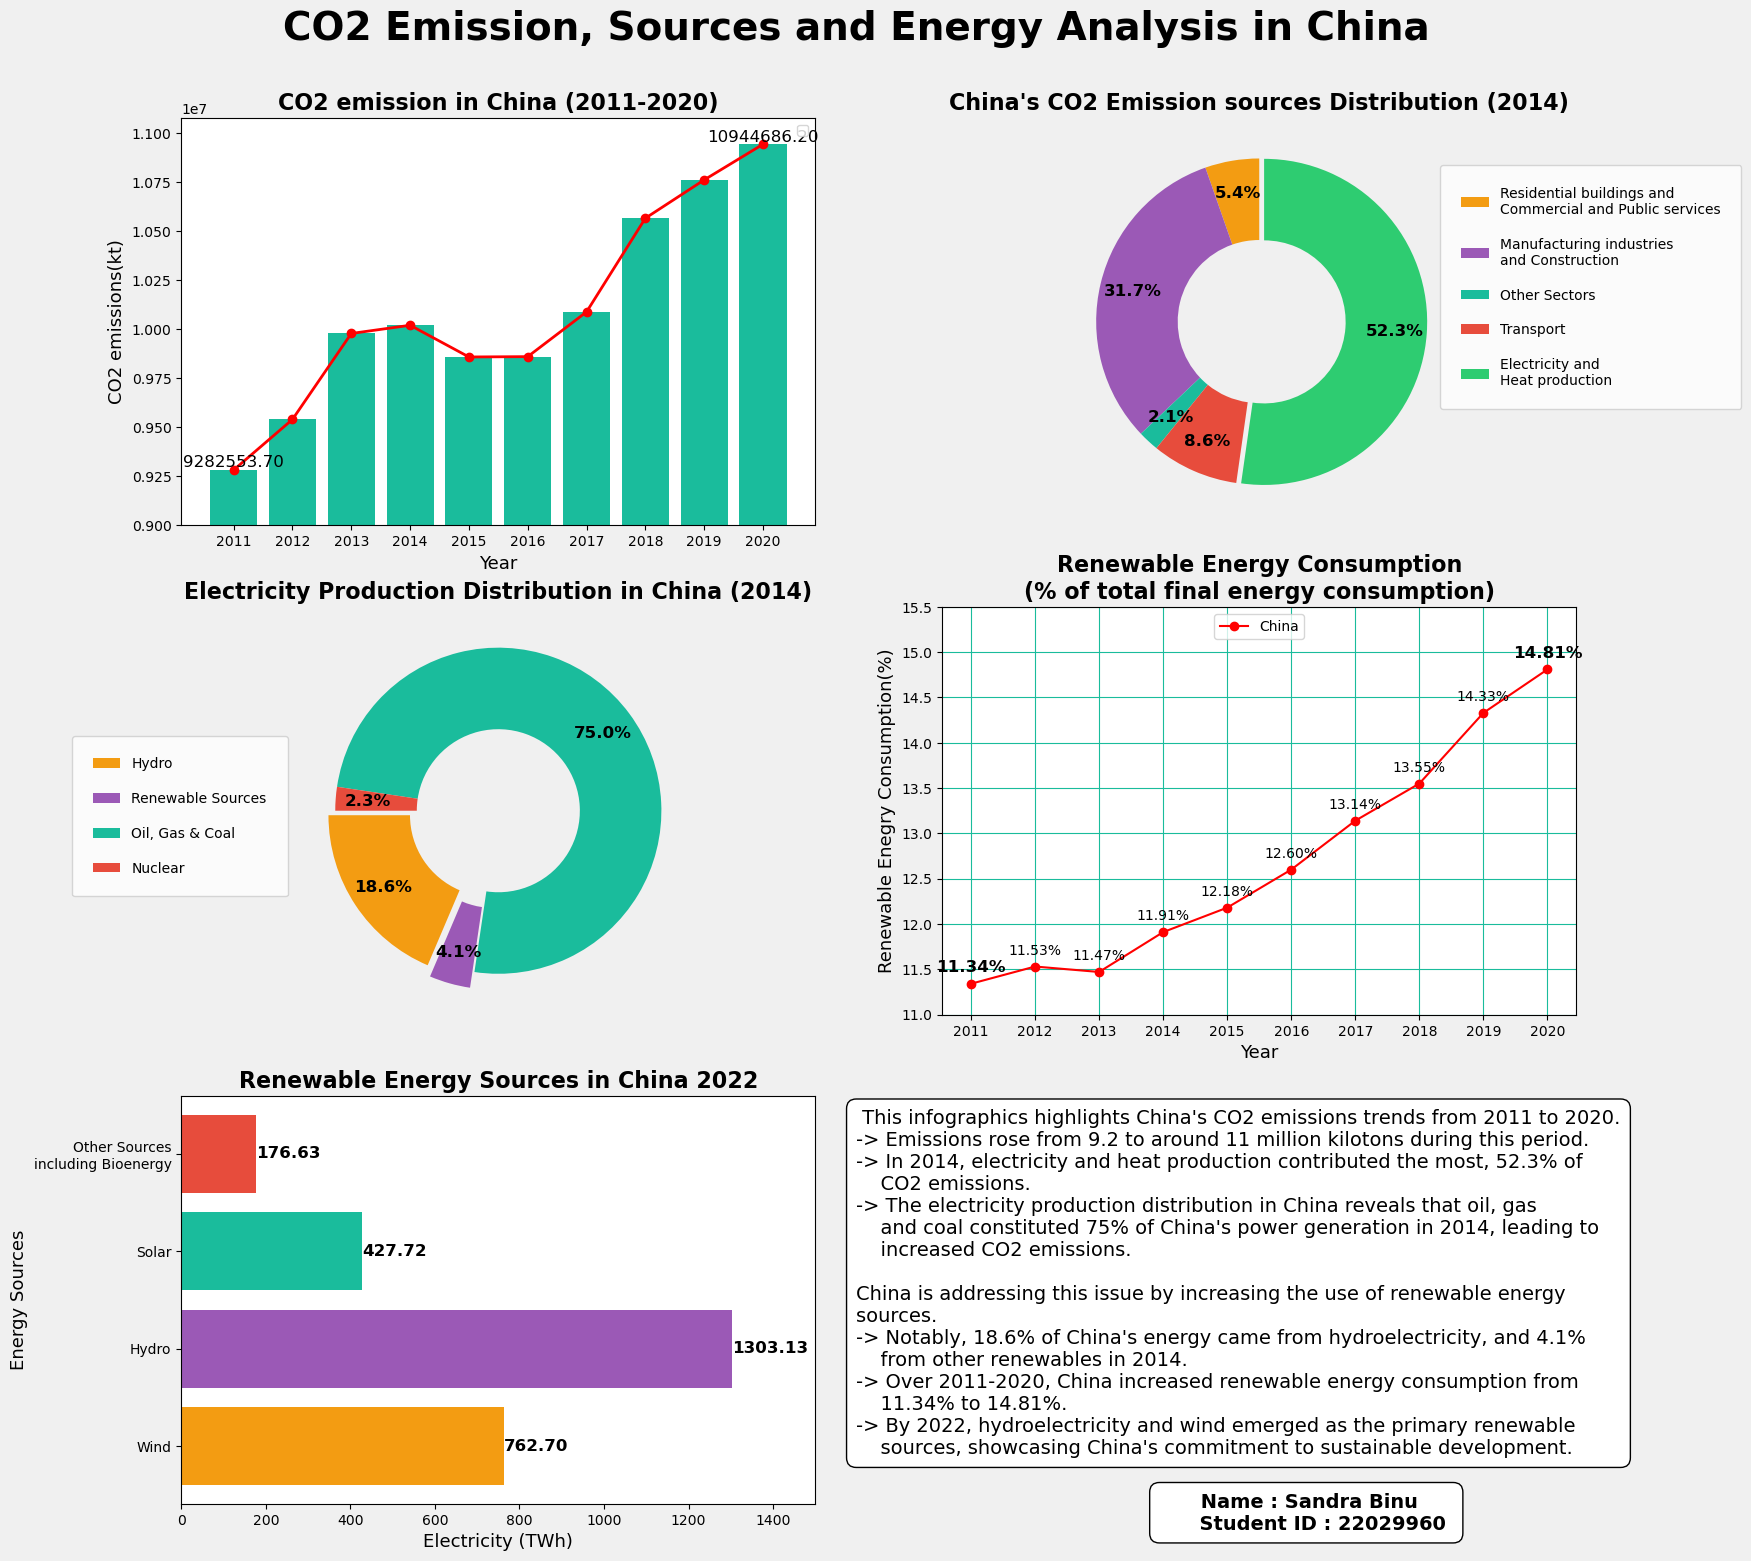

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def readFile(filename,sheetname, yr):
    """ function to read and clean a World Bank files

    Args:
        filename (string): filepath to the World Bank file
        sheetname(string): name of the sheet containing data
        yr (list): list of years to be dropped from the dataframe

    Returns:
        final_df (dataframe): clean dataframe with selected years
    """
    df = pd.read_excel(filename,sheet_name=sheetname, skiprows=4)  # read the data
    # dropping the unwanted columns
    columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code']
    ref_df = df.drop(columns=columns_to_drop)
    # filtering the years
    final_df = ref_df.drop(columns=yr)
    # reseting the index
    final_df = final_df.reset_index(drop=True)
    return final_df


def Infographic(country, text, name):
    """ Function to create the infographics

    Args:
        country (string): the country being analysed
        text (string): analysed report
        name (string): name and id
    """
    
    # initializing the figure
    fig = plt.figure(figsize=(18, 18), facecolor='#F0F0F0')
    plt.suptitle('CO2 Emission, Sources and Energy Analysis in China',
                 fontsize=28, y=0.94, fontweight='bold')

    #filtering the country and years
    co2_china = co2[co2['Country Name'] == country]
    co2_china_yr = co2_china.iloc[:, 1:]
    co2_china_series = co2_china_yr.squeeze()
    # defining colours list
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12',
              '#9b59b6', '#1abc9c', '#e74c3c', '#2ecc71']

    # barchart
    plt.subplot(3, 2, 1)
    plt.bar(list(co2_china_yr.columns),
            co2_china_yr.unstack().values.tolist(), color=colors[5])
    plt.plot(co2_china_series, marker='o', color='r', linewidth=2)
    first_value = co2_china_yr.unstack().values.tolist()[0]
    last_value = co2_china_yr.unstack().values.tolist()[-1]
    plt.text(co2_china_yr.columns[0], first_value,
             f'{first_value:.2f}', ha='center', va='bottom', color='black', fontsize=12)
    plt.text(co2_china_yr.columns[-1], last_value,
             f'{last_value:.2f}', ha='center', va='bottom', color='black', fontsize=12)
    plt.gca().set_xticks([yr for yr in range(2011, 2021)])
    plt.title('CO2 emission in China (2011-2020)',
              fontweight='bold', fontsize=16)
    plt.ylabel('CO2 emissions(kt)', fontsize=13)
    plt.xlabel('Year', fontsize=13)
    plt.ylim(9000000, 11080000)
    plt.legend()

    # filtering the desired country from dfs
    build_df = build[(build['Country Name'] == country)]
    manuf_df = manuf[(manuf['Country Name'] == country)]
    oth_sectors_df = oth_sectors[(oth_sectors['Country Name'] == country)]
    transport_df = transport[(transport['Country Name'] == country)]
    ele_heat_df = ele_heat[(ele_heat['Country Name'] == country)]
    renew_df = renew_cons[(renew_cons['Country Name'] == country)]
    dfs = [build_df, manuf_df, oth_sectors_df, transport_df, ele_heat_df]
    china_data = [df.loc[df['Country Name'] == country, 2014].values[0]
                  for df in dfs]
    sources1 = ['Residential buildings and\nCommercial and Public services',
                'Manufacturing industries\nand Construction',
                'Other Sectors', 'Transport', 'Electricity and\nHeat production']

    # Pieplot1
    plt.subplot(3, 2, 2)
    plt.pie(china_data, autopct='%1.1f%%',
            pctdistance=0.8, startangle=90, explode=(0, 0, 0, 0, 0.03),
            colors=colors[3:], wedgeprops=dict(width=0.5),
            textprops={'fontweight':'bold','fontsize':12})
    plt.title('China\'s CO2 Emission sources Distribution (2014)',
              fontweight='bold', fontsize=16)
    plt.legend(labels=sources1, loc='best', bbox_to_anchor=(
        0.8, 0.2, 0.9, 0.7), borderpad=1.5, labelspacing=1.5)

    # pieplot2
    pie_dfs = [hydro, renew, ogc, nucl]
    china_pie = [df.loc[df['Country Name'] == 'China', 2014].values[0]
                 for df in pie_dfs]
    sources = ['Hydro', 'Renewable Sources', 'Oil, Gas & Coal', 'Nuclear']
    plt.subplot(3, 2, 3)
    plt.pie(china_pie, autopct='%1.1f%%', startangle=180,
            pctdistance=0.8, explode=(0.05, 0.1, 0, 0), colors=colors[3:],
            wedgeprops=dict(width=0.5),textprops={'fontweight':'bold','fontsize':12})
    plt.title('Electricity Production Distribution in China (2014)',
              fontweight='bold', fontsize=16)
    plt.legend(labels=sources, loc='best', bbox_to_anchor=(
        0, 0, 0, 0.7), borderpad=1.5, labelspacing=1.5)

    renew_df.set_index('Country Name', inplace=True)

    # linechart
    plt.subplot(3, 2, 4)
    plt.grid(color=colors[5])
    for country in renew_df.index:
        plt.plot(renew_df.columns,
                 renew_df.loc[country], label=country, marker='o', color='r')
        for i, (year, value) in enumerate(zip(renew_df.columns, renew_df.loc[country])):
            if i == 0 or i == len(renew_df.columns) - 1:
                plt.text(year, value + 0.1, f'{value:.2f}%', ha='center',
                         va='bottom', color='black', fontsize=12, fontweight='bold')
            else:
                plt.text(year, value + 0.1, f'{value:.2f}%',
                         ha='center', va='bottom', color='black', fontsize=10)
    plt.gca().set_xticks([yr for yr in range(2011, 2021)])
    plt.title('Renewable Energy Consumption\n(% of total final energy consumption)',
              fontweight='bold', fontsize=16)
    plt.xlabel('Year', fontsize=13)
    plt.ylabel('Renewable Enegry Consumption(%)', fontsize=13)
    plt.ylim(11, 15.5)
    plt.legend(loc='upper center')

    # horizontal barchart
    selected_data = renew_prod[(renew_prod['Entity'] == country) & (
        renew_prod['Year'] == 2022)]
    bar_data = selected_data[['Electricity from wind - TWh',
                              'Electricity from hydro - TWh',
                              'Electricity from solar - TWh',
                              'Other renewables including bioenergy - TWh']]
    bar_values = bar_data.unstack().values.tolist()
    renew_sources = ['Wind', 'Hydro', 'Solar',
                     'Other Sources\nincluding Bioenergy']
    plt.subplot(3, 2, 5)
    bars = plt.barh(renew_sources, bar_values, color=colors[3:])
    plt.title('Renewable Energy Sources in China 2022',
              fontweight='bold', fontsize=16)
    plt.xlabel('Electricity (TWh)', fontsize=13)
    plt.ylabel('Energy Sources', fontsize=13)
    plt.xlim(0, 1500)
    for bar, value in zip(bars, bar_values):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}',
                 va='center', ha='left', fontsize=12, fontweight='bold')

    #writing description and name
    plt.text(0.5, 0.2325, text, ha='left', va='center',
             transform=plt.gcf().transFigure, fontsize=14,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    plt.text(0.75, 0.105, name, ha='center', va='center',
             transform=plt.gcf().transFigure, fontsize=14, fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    #saving the figure
    #plt.savefig('22029960.png', dpi=300, bbox_inches='tight')
    #show the figure
    plt.show()

#filepaths
data_file='Main_Data.xlsx'

#reading modern renewable products csv file
renew_prod = pd.read_csv('modern-renewable-prod.csv')

#filtering years
yr_co2 = [float(year) for year in range(1960, 2011)] + [float(year)
                                                      for year in range(2021, 2023)]
yr_pie = [float(year) for year in range(1960, 2014)] + [float(year)
                                                      for year in range(2015, 2023)]
yr_null = []

#reading the dfs
co2 = readFile(data_file,'co2', yr_co2)
ele_heat = readFile(data_file,'ele_heat', yr_pie)
manuf = readFile(data_file,'manuf', yr_pie)
oth_sectors = readFile(data_file,'oth_sectors', yr_pie)
transport = readFile(data_file,'transport', yr_pie)
build = readFile(data_file,'building', yr_pie)
hydro = readFile(data_file,'hydro_electric', yr_co2)
ogc = readFile(data_file,'oil_gas_coal', yr_co2)
renew = readFile(data_file,'renew', yr_co2)
nucl = readFile(data_file,'nuclear', yr_co2)
renew_cons = readFile(data_file,'renew_cons', yr_co2)

#description on the infographics
text = """ This infographics highlights China's CO2 emissions trends from 2011 to 2020.
-> Emissions rose from 9.2 to around 11 million kilotons during this period. 
-> In 2014, electricity and heat production contributed the most, 52.3% of 
    CO2 emissions. 
-> The electricity production distribution in China reveals that oil, gas 
    and coal constituted 75% of China's power generation in 2014, leading to 
    increased CO2 emissions.

China is addressing this issue by increasing the use of renewable energy 
sources. 
-> Notably, 18.6% of China's energy came from hydroelectricity, and 4.1% 
    from other renewables in 2014. 
-> Over 2011-2020, China increased renewable energy consumption from 
    11.34% to 14.81%. 
-> By 2022, hydroelectricity and wind emerged as the primary renewable 
    sources, showcasing China's commitment to sustainable development."""

#name and id
name = """ Name : Sandra Binu
      Student ID : 22029960 """

#calling the function
Infographic('China', text, name)